In [1]:
from datetime import datetime

import numpy as np
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
d_sunspot = pd.read_csv('data/SN_d_tot_V2.0.csv', delimiter=';', names=['year', 'month', 'day', 'date', 'n_sunspot', 'err_sunspot', 'n_observations', 'provisional'], na_values={'n_sunspot': '-1', 'err_sunspot': '-1'})

m_sunspot = pd.read_csv('data/SN_m_tot_V2.0.csv', delimiter=';', names=['year', 'month', 'date', 'n_sunspot', 'err_sunspot', 'n_observations', 'provisional'], na_values={'n_sunspot': '-1', 'err_sunspot': '-1'})

ms_sunspot = pd.read_csv('data/SN_ms_tot_V2.0.csv', delimiter=';', names=['year', 'month', 'date', 'n_sunspot', 'err_sunspot', 'n_observations', 'provisional'], na_values={'n_sunspot': '-1', 'err_sunspot': '-1'})

In [3]:
psp_mag_str = [('2018-10-02','2018-12-19'), ('2019-02-20','2025-01-26'), ('2025-02-04','2025-04-30')]
psp_sw_str = [('2018-10-31','2018-12-19'), ('2019-01-20','2019-02-02'), ('2019-02-20','2019-02-27'), ('2019-03-06','2019-05-15'), ('2019-07-20','2019-08-30'), ('2019-09-18','2019-10-13'), ('2019-12-17','2020-01-01'), ('2020-01-07','2020-04-29'), ('2020-05-03','2020-07-11'), ('2020-07-20','2020-12-21'), ('2020-12-25','2021-02-25'), ('2021-03-03','2021-03-17'), ('2021-03-29','2021-03-31'), ('2021-04-09','2021-11-22'), ('2021-12-12','2021-12-13'), ('2022-01-27','2022-04-01'), ('2022-04-05','2023-01-12'), ('2023-01-17','2023-03-22'), ('2023-03-27','2024-06-27'), ('2024-07-02','2024-09-27'), ('2024-10-02','2024-10-16'), ('2024-10-22','2024-11-26'), ('2024-12-11','2025-01-26'), ('2025-02-04','2025-05-31')]
solo_mag_str = [('2020-04-15','2020-04-20'), ('2020-06-01','2025-05-31')]
solo_sw_str = [('2020-07-07', '2020-08-20'), ('2020-08-27', '2020-09-06'), ('2020-09-14', '2020-10-27'), ('2021-04-09', '2025-05-31')]

In [4]:
def str_to_date(date_list):

    dates = []
    for date in date_list:
        start, end = date
        dates.append((datetime.strptime(start, '%Y-%m-%d'), datetime.strptime(end, '%Y-%m-%d')))

    return dates

In [5]:
def date_to_decimal(date_list):

    dates_dec = []
    
    for date in date_list:
        start, end = date
        start_dec = start.year + start.month * 1/12 + start.day * 1/365
        end_dec = end.year + end.month * 1/12 + end.day * 1/365

        dates_dec.append((start_dec, end_dec))

    return dates_dec

In [6]:
psp_mag_dates = date_to_decimal(str_to_date(psp_mag_str))
psp_sw_dates = date_to_decimal(str_to_date(psp_sw_str))
solo_mag_dates = date_to_decimal(str_to_date(solo_mag_str))
solo_sw_dates = date_to_decimal(str_to_date(solo_sw_str))

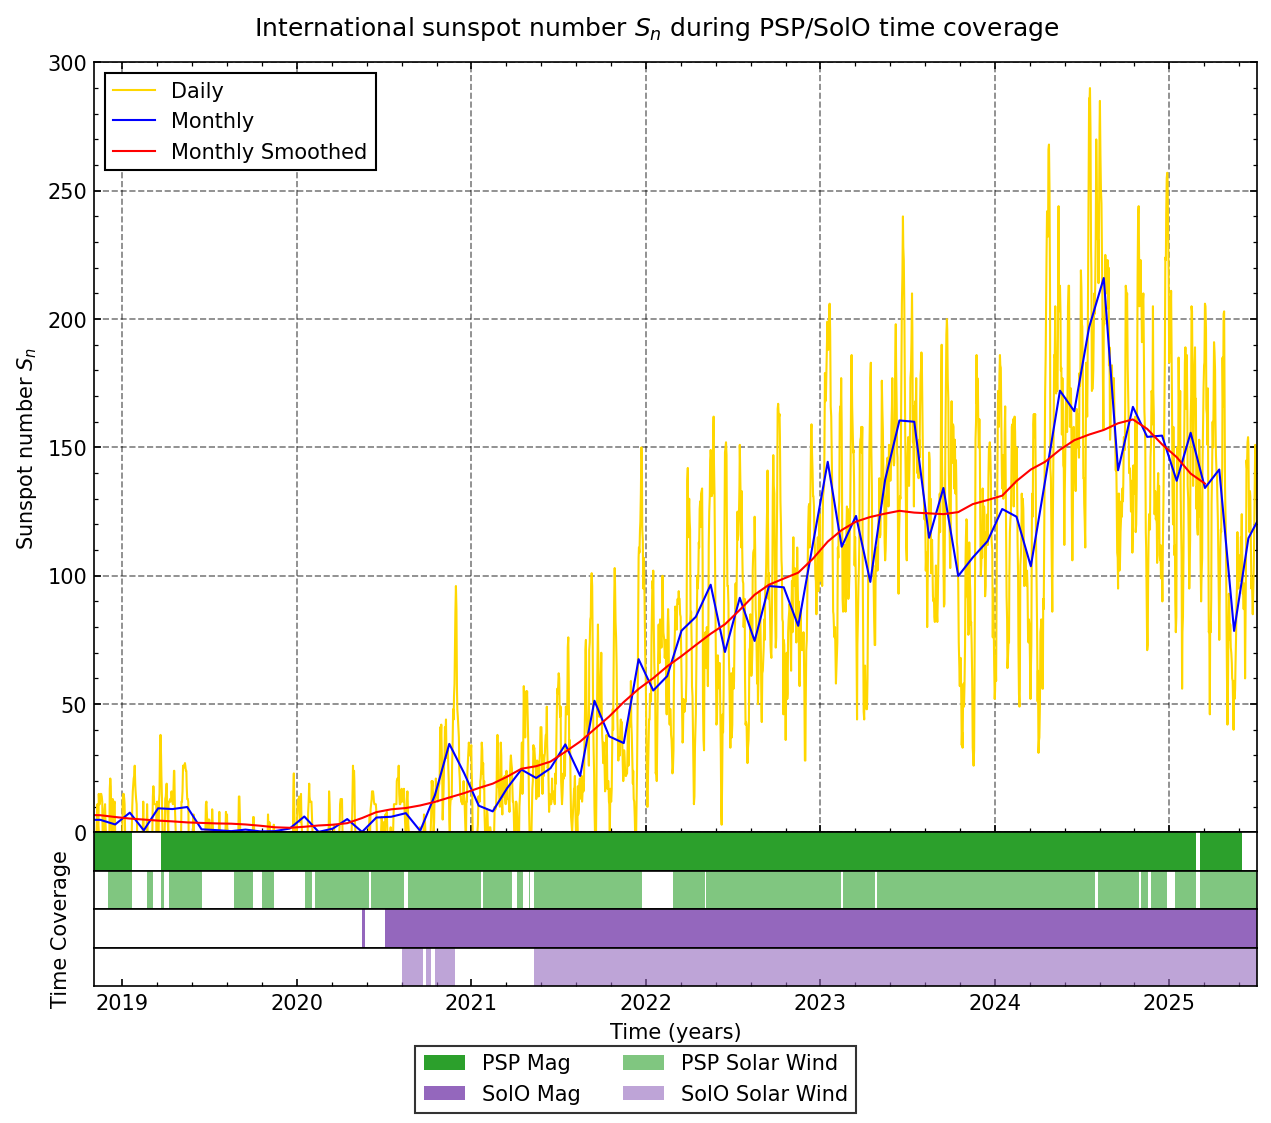

In [19]:
fig = plt.figure(figsize=(10,8), dpi=150)
gs = fig.add_gridspec(5, 1, hspace=0, height_ratios=[10, .5, .5, .5, .5])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax4 = fig.add_subplot(gs[3], sharex=ax1)
ax5 = fig.add_subplot(gs[4], sharex=ax1)

ax1.plot(d_sunspot['date'], d_sunspot['n_sunspot'], label='Daily', c='gold', lw=1)
ax1.plot(m_sunspot['date'], m_sunspot['n_sunspot'], label='Monthly', c='blue', lw=1)
ax1.plot(ms_sunspot['date'], ms_sunspot['n_sunspot'], label='Monthly Smoothed', c='red', lw=1)

# Axes labels and limits
ax5.set_xlabel('Time (years)')
ax1.set_ylabel('Sunspot number $S_n$')

ax1.set_xlim([min(min(psp_mag_dates)), max(max(solo_mag_dates))
])
ax1.set_ylim([0, 300])

# Ticks
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in')
ax5.tick_params(which='both', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')

for tick in ax5.xaxis.get_major_ticks():
    tick.label1.set_zorder(4)
    tick.tick1line.set_zorder(4)
    tick.tick2line.set_zorder(4)

# Grid, legend, title
ax1.grid(ls='--', c='k', alpha=.5)
ax1.legend(loc='upper left', framealpha=1, fancybox=False, edgecolor='black')

# PSP/Solo coverage
# Remove Ticks
ax2.set(yticklabels=[])
ax2.tick_params(left=False)

ax3.set(yticklabels=[])
ax3.tick_params(left=False)

ax4.set(yticklabels=[])
ax4.tick_params(left=False)

ax5.set(yticklabels=[])
ax5.tick_params(left=False)

# Show psp timeline
for dates in psp_mag_dates:
    start, stop = dates
    ax2.add_patch(plt.Rectangle((start, 0), stop-start, 1, facecolor='tab:green', zorder=1, edgecolor=None))

for dates in psp_sw_dates:
    start, stop = dates
    #ax2.hlines(np.linspace(0, 1.1, 10), start, stop, color='lightgrey')
    ax3.add_patch(plt.Rectangle((start, 0), stop-start, 1, facecolor='tab:green', alpha=.6, zorder=2, edgecolor=None))

# Show solo timeline
for dates in solo_mag_dates:
    start, stop = dates
    ax4.add_patch(plt.Rectangle((start, 0), stop-start, 1, facecolor='tab:purple', zorder=1, edgecolor=None))

for dates in solo_sw_dates:
    start, stop = dates
    ax5.add_patch(plt.Rectangle((start, 0), stop-start, 1, facecolor='tab:purple', alpha=.6, zorder=2, edgecolor=None))

#ax2.set_ylabel('PSP')
#ax3.set_ylabel('PSP')
ax4.set_ylabel('Time Coverage')
#ax5.set_ylabel('SolO')

ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax4.set_ylim(0, 1)
ax5.set_ylim(0, 1)

rectangles = [Patch(facecolor='tab:green', edgecolor=None, label='PSP Mag'), Patch(facecolor='tab:purple', edgecolor=None, label='SolO Mag'), Patch(facecolor='tab:green', alpha=.6, edgecolor=None, label='PSP Solar Wind'), Patch(facecolor='tab:purple', alpha=.6, edgecolor=None, label='SolO Solar Wind')]

fig.legend(handles=rectangles, loc='lower center', ncols=2, fancybox=False, edgecolor='k')

fig.suptitle('International sunspot number $S_n$ during PSP/SolO time coverage', y=0.92);